In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps
%matplotlib inline


In [4]:
img = cv2.imread("/home/raghav/SIH22/VORTEX/data/processed/crop_data/EXTREME/3DIMG_04NOV2019_0000_L1B_STD_IR2.jpg")

In [9]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

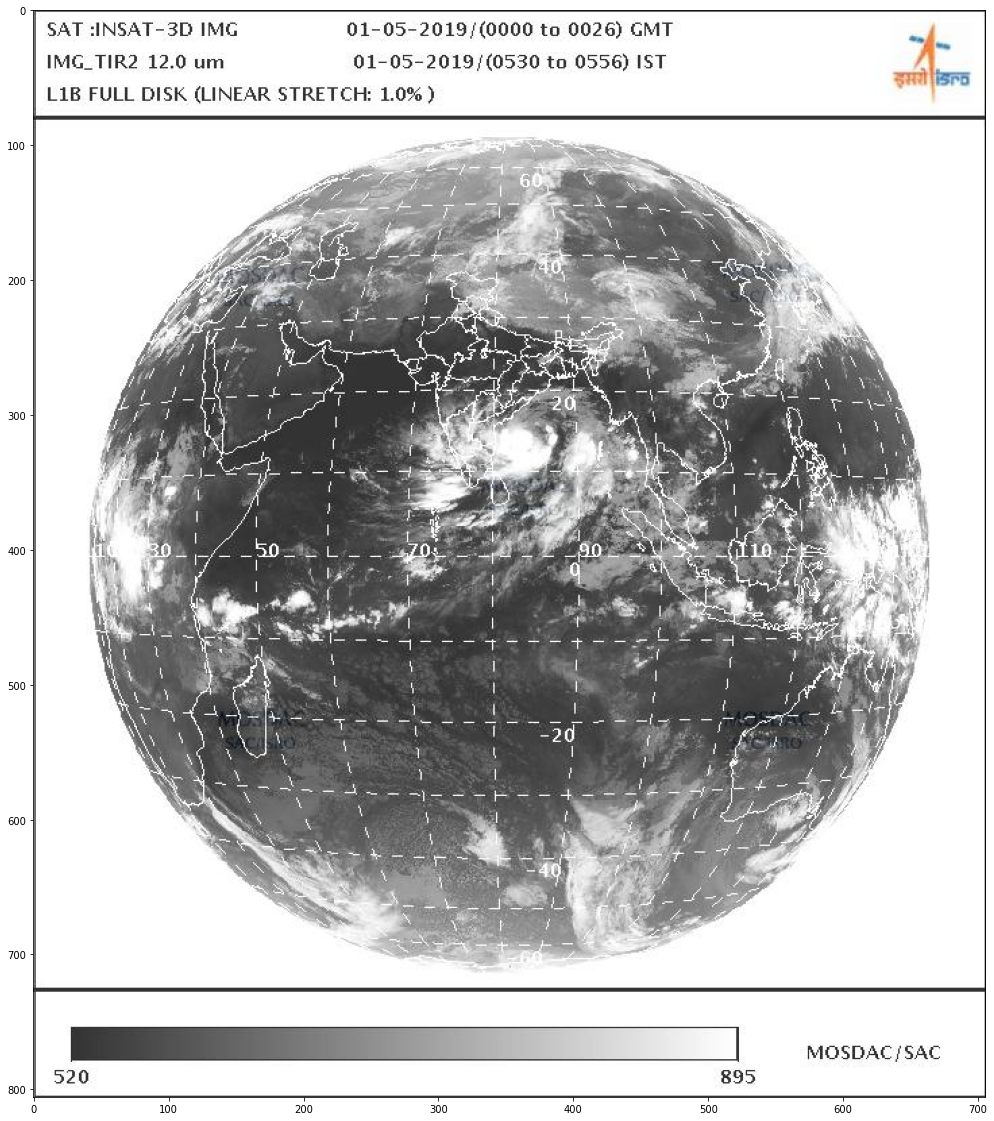

In [10]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(img)

In [11]:
img_gray = cv2.imread("./assets/images/demoImg.jpeg",cv2.IMREAD_GRAYSCALE)

In [12]:
img_gray.shape

(806, 706)

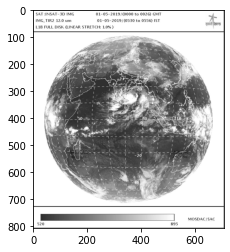

In [13]:
plt.imshow(img_gray,cmap='gray')

In [6]:
#dsize  = width,height
#whereas above in shape its displaying h,w
#new_img1 = cv2.resize(img,(1400,1600))

In [7]:
#w_ratio = 1.2 # will be double of the original width
#h_ratio = 1.2
#new_img1 = cv2.resize(img_gray,(0,0),img_gray,w_ratio,h_ratio)

### code for showing img using plt with custom figsize

- fig = plt.figure(figsize=(20,16))
- ax = fig.add_subplot(111)
- ax.imshow(new_img1)

In [8]:
'''
while True:
    cv2.imshow("Grayscale Img",img_gray)
    cv2.imshow("Grayscale image resized to 0.5,0.5",new_img2)
    cv2.imshow("Grayscale image resized to 1.2,1.2",new_img1)
    #if we have waited at least 1 ms and we have pressed the q key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
'''

'\nwhile True:\n    cv2.imshow("Grayscale Img",img_gray)\n    cv2.imshow("Grayscale image resized to 0.5,0.5",new_img2)\n    cv2.imshow("Grayscale image resized to 1.2,1.2",new_img1)\n    #if we have waited at least 1 ms and we have pressed the q key\n    if cv2.waitKey(1) & 0xFF == ord(\'q\'):\n        break\ncv2.destroyAllWindows()\n'

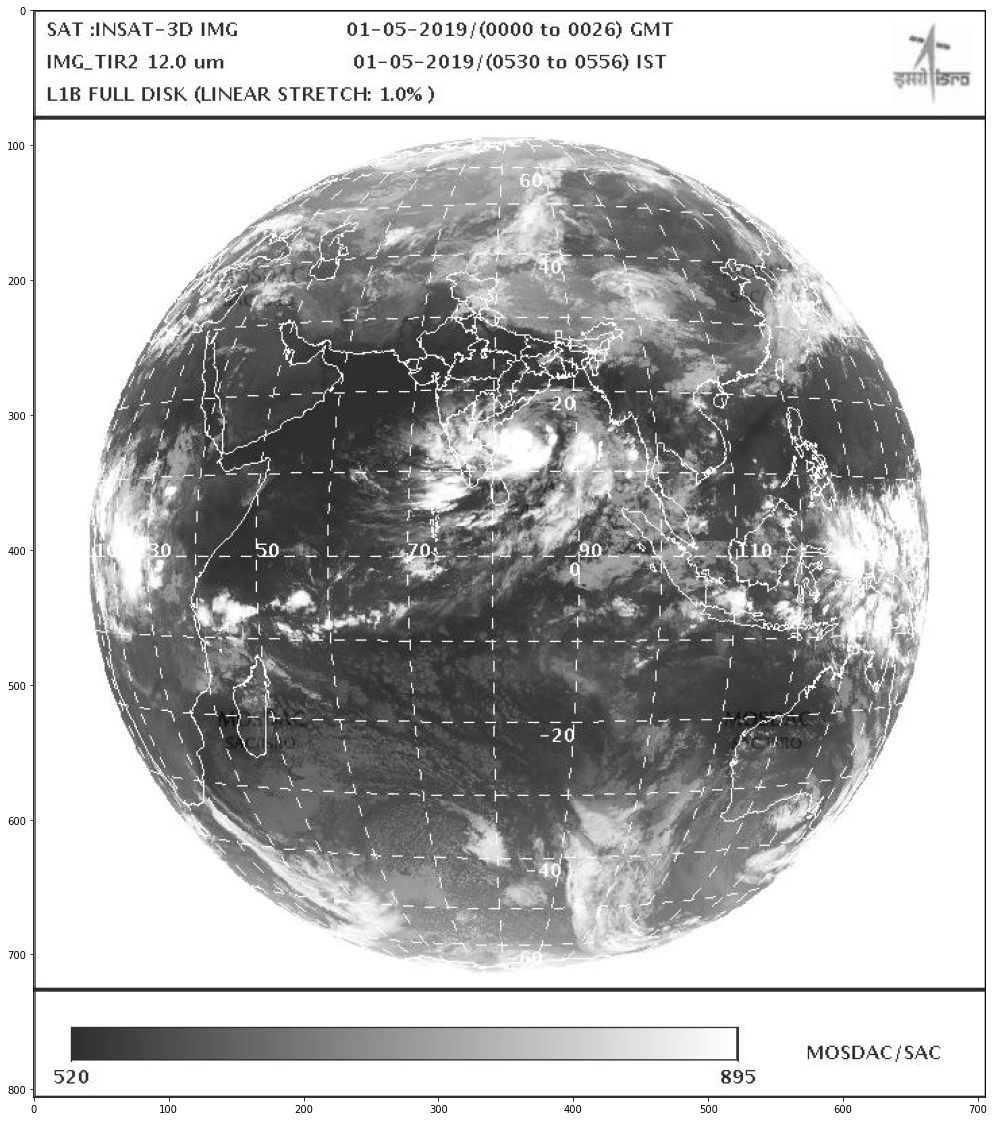

In [14]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(img_gray,cmap='gray')

In [10]:
# ROI

# top left point  = 170,220
# bottom right point =  620,680

resized = cv2.rectangle(img_gray.copy(),(170,220),(520,580),(0,255,0),3)


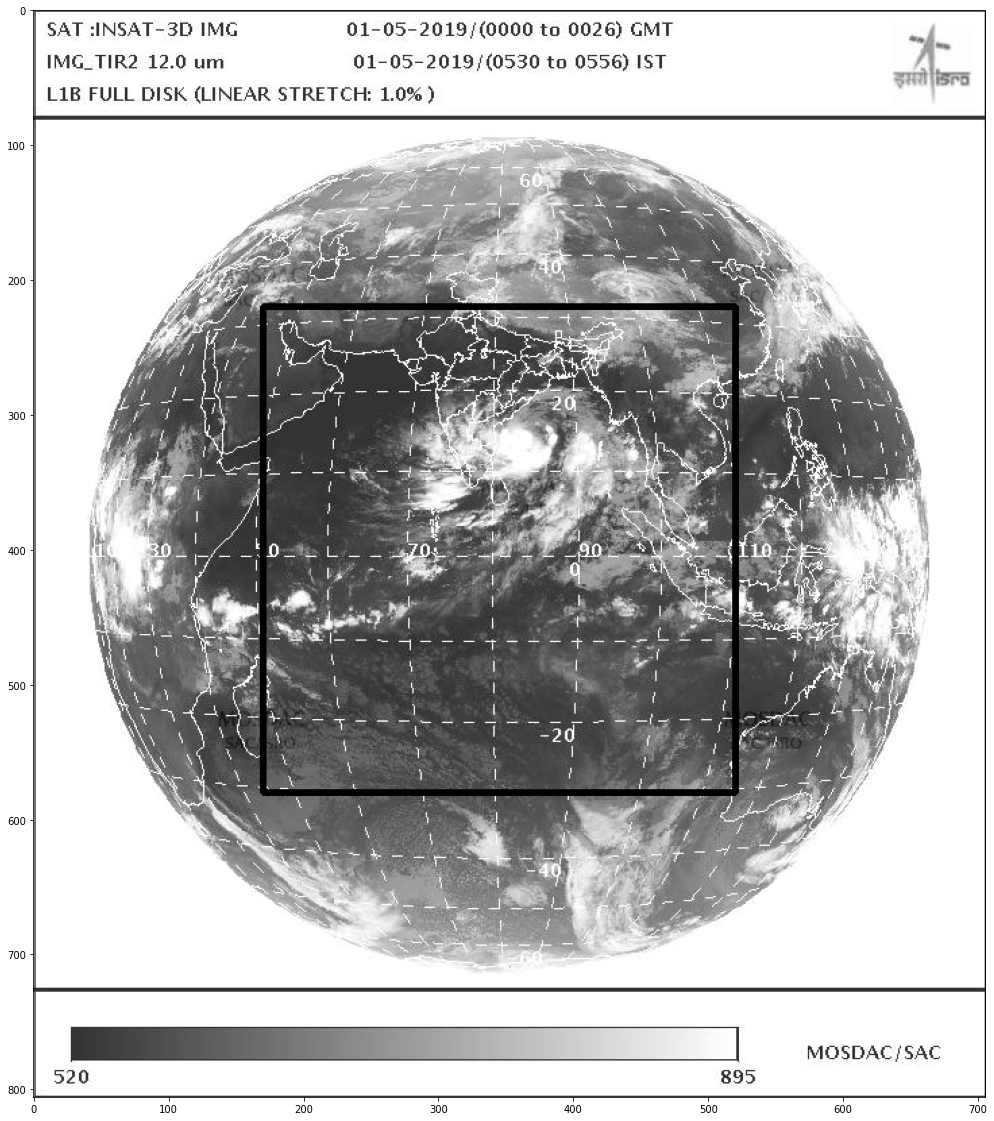

In [11]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(resized,cmap='gray')

In [18]:
def display_img(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [29]:
resized2 = cv2.rectangle(img_gray.copy(),(220,250),(465,520),(0,255,0),3)

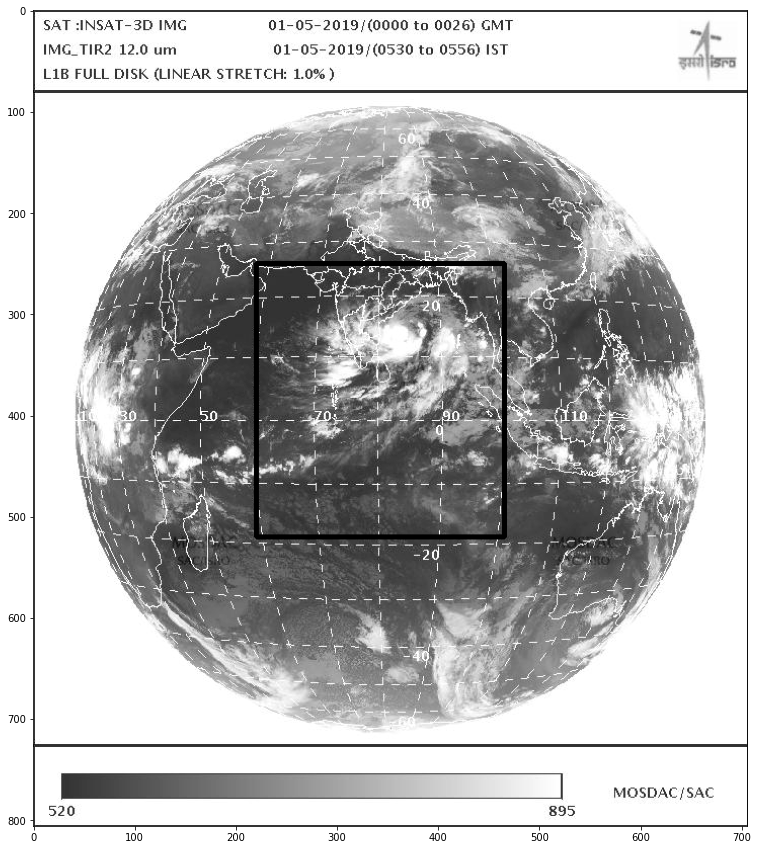

In [30]:
display_img(resized2)

In [31]:
crop_img2 = img_gray[250:520,220:465]

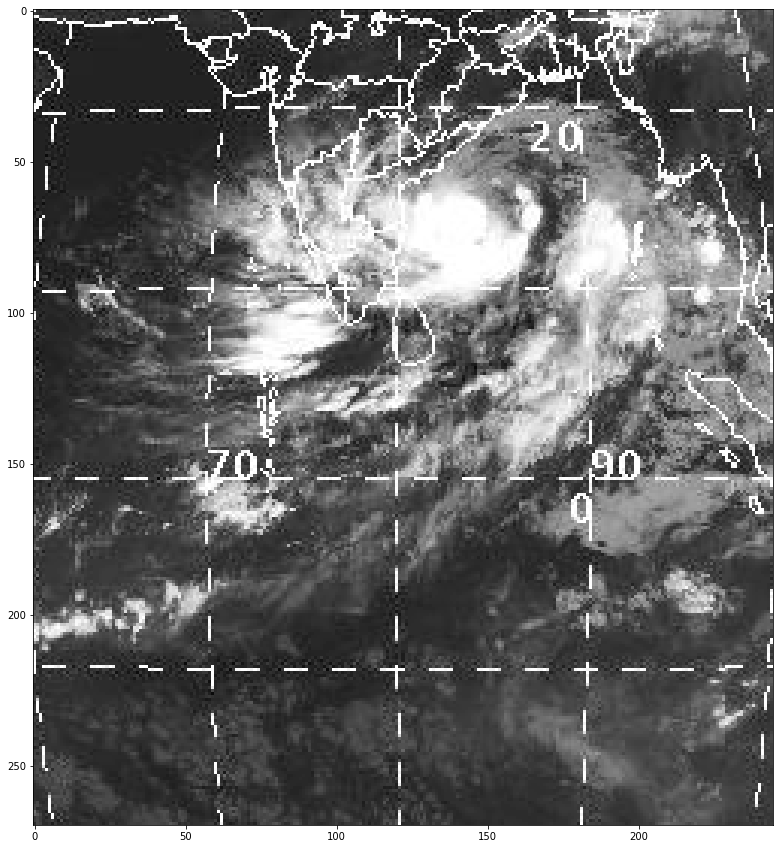

In [32]:
display_img(crop_img2)

In [12]:
# lets slice out this ROI
# for cv2.rectangle, top left = x1,y1, bottom right = x2,y2 
# while slicing that particular rectangular roi, use [y1:y2,x1:x2]
crop_img = img_gray[220:580,170:520]

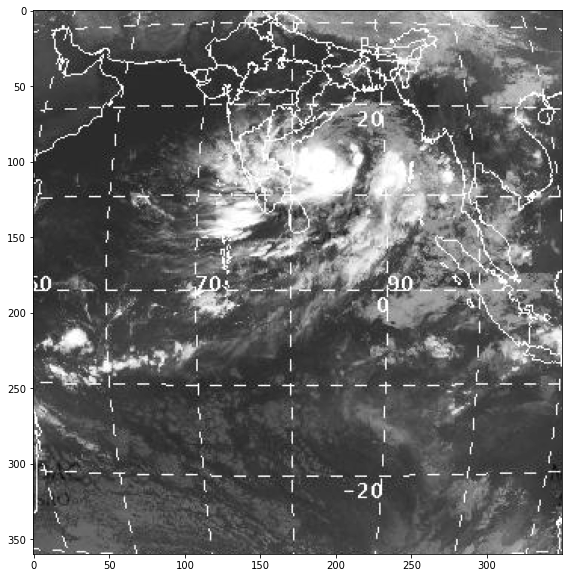

In [49]:
display_img(crop_img)

In [18]:
cv2.imwrite('./assets/images/roi_image.jpeg',crop_img)

True

In [19]:
# Applying thresholding 
# color image to binary(o or 1)
test_img = crop_img.copy()

In [20]:
type(test_img)

numpy.ndarray

In [21]:
test_img.shape


(360, 350)

In [24]:
print(test_img.max())
255/2

255


127.5

In [26]:
# we are giving 127 as threshold value and 255 as max pixel value possible
# below code will change the value of each pixel to 0 if px < 127 and 1 if it is > 127
ret, thresh1 = cv2.threshold(test_img,127,255,cv2.THRESH_BINARY)
#ret will store the thresh value

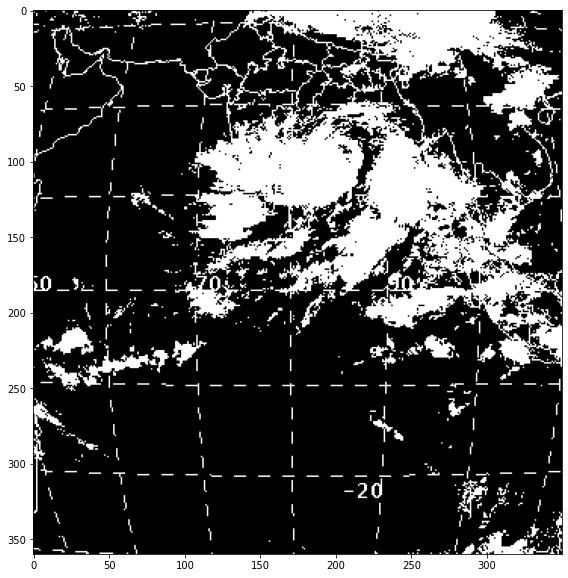

In [50]:
display_img(thresh1)

In [28]:
# for reverse the thresholding
ret, thresh2 = cv2.threshold(test_img,127,255,cv2.THRESH_BINARY_INV)

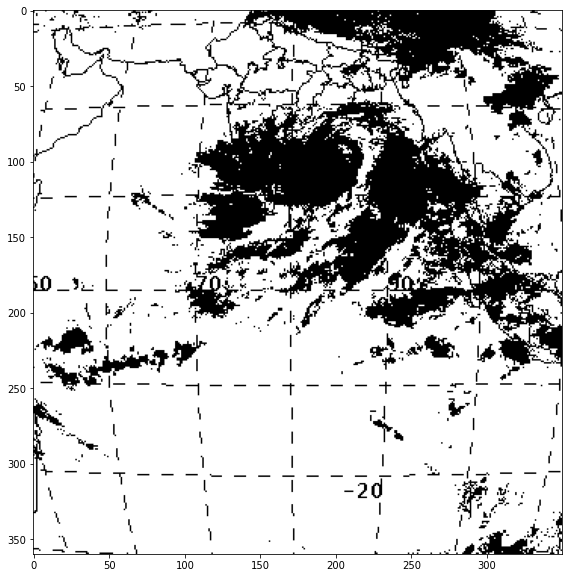

In [51]:
display_img(thresh2)

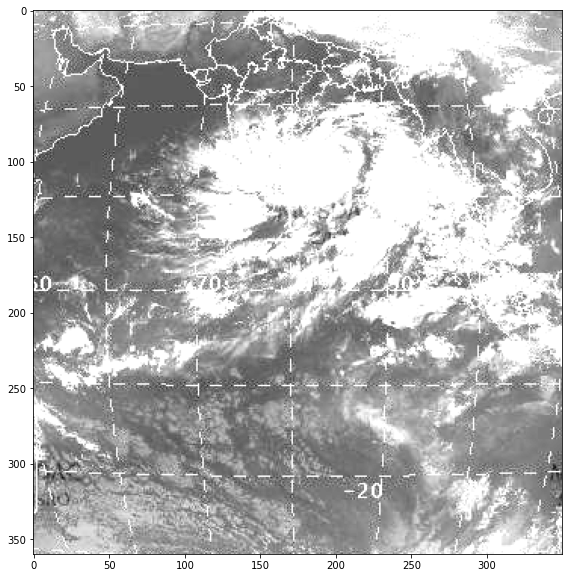

In [52]:
ret, thresh3 = cv2.threshold(test_img,127,255,cv2.THRESH_TRUNC)
display_img(thresh3)

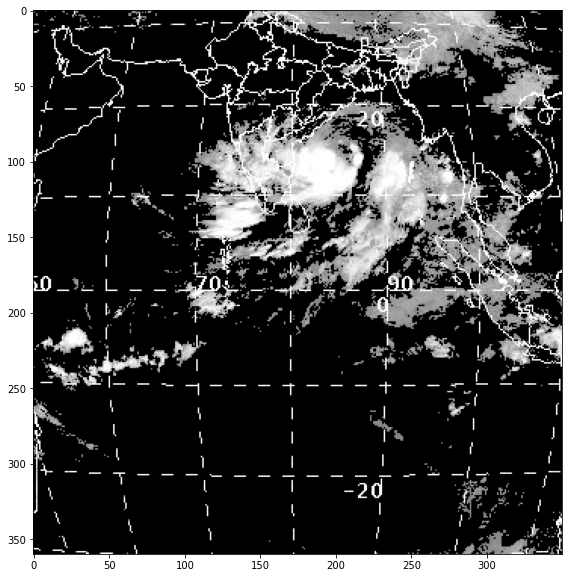

In [53]:
ret, thresh4 = cv2.threshold(test_img,127,255,cv2.THRESH_TOZERO)
display_img(thresh4)

In [41]:
cv2.imwrite('./assets/images/crop_thresh2Zero.jpeg',thresh4)

True

#### Blurring or smoothing an image can help get rid of noise, or help an application focus on general details.

In [43]:
# gamma correction is used to increase or decrease brightness on the actual image

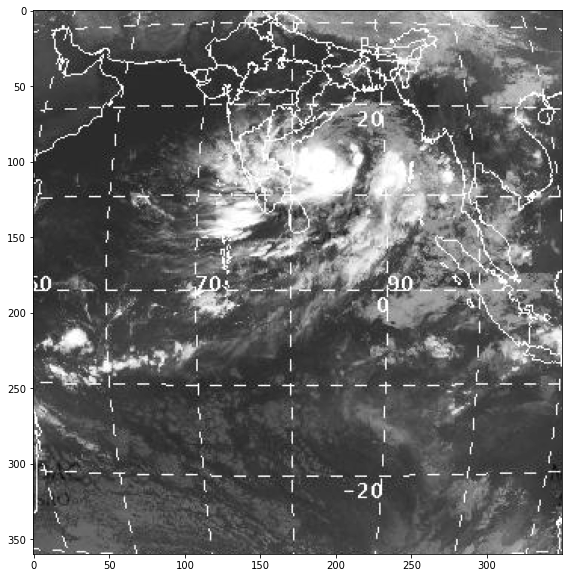

In [57]:
display_img(test_img)

### Gamma = 1 for original image, gamma<1 for decreasing the brightness and gamma>1 for increasing the same

In [58]:
gamma = 1/4

In [59]:
g_img1 = np.power(test_img,gamma)

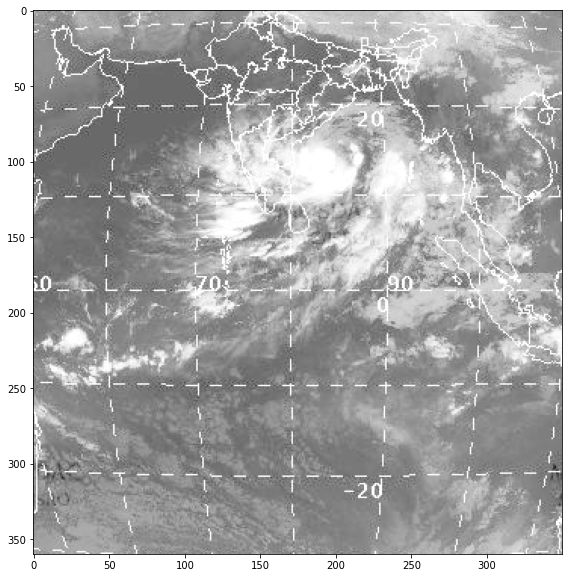

In [60]:
display_img(g_img1)

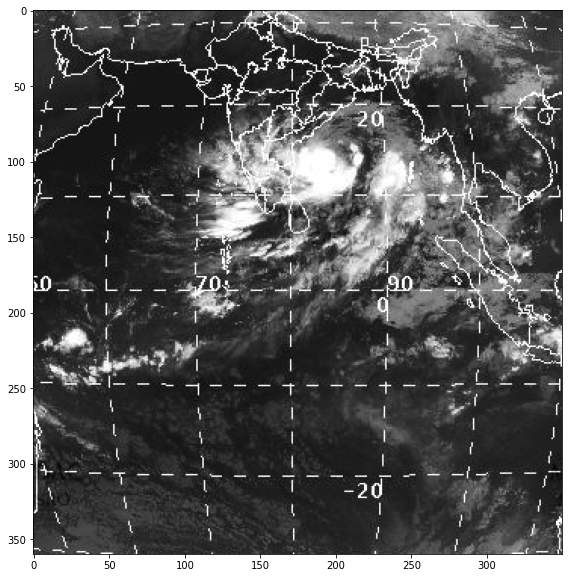

In [62]:
g_img2 = np.power(test_img,1.5)
display_img(g_img2)

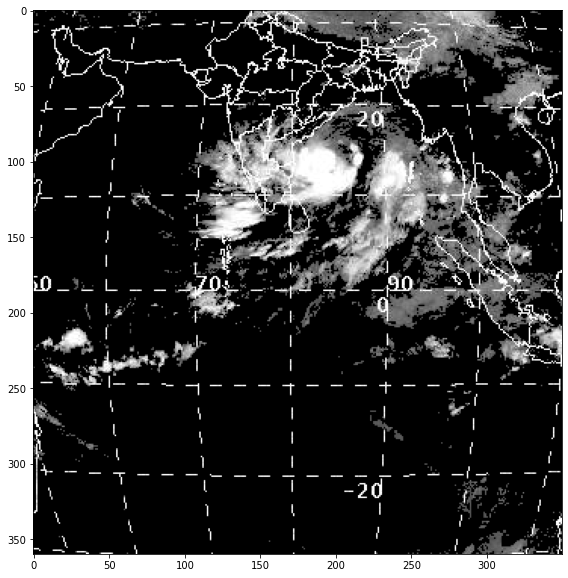

In [65]:
# lets try to increase the brightness of img we got after applying tozero thresholding
g_img3 = np.power(thresh4,1.7)
display_img(g_img3)